<a href="https://colab.research.google.com/github/RoseMwangi98/STOCK-PREDICTION-USING-RNN/blob/main/Portfolio_SP500_Stock_Price_Prediction_with_LSTMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introduction and Overview**


**1.Defining the Question**

We have a portfolio of 4 stocks namely: Apple, Facebook, Google and Tesla. We would like to build models that provide a forecast of the future share price. In addition, we build a model that predicts the future price of a reference index(S&P 500) using Long Short Term Memory (LTSM) a subset of Neural Networks.

**2.Metric for Success**

The best performing model with the least and most sensible Root Mean Square Error and the highest Accuracy Score. 

**3.The Context**

Stock market price prediction is a fundamental exercise in Finance, Valuation, Accounting et al. Share price forecasting is one of the avenues for creating a semblance of clarity in a rather risky and unceratin world of finance enabling investment decisions. To do this, the market relies on historical data. For our purposes, we leverage publicly available data over a 5year period to build a predictive model. 


**4.The Experimental Design Taken**

This first step of this analysis will be loading the dataset , the appropriate libraries and then taking the necessary steps to clean the data. Next we will carry out Univariate and Bivariate data analysis while dealing with the outliers found within the dataset. Finally we will build RNN models and evaluate their performance on the dataset at hand and then provide observations and recommendations on the suitability of each of the tested models on their appropriateness in solving the given problem.

**5.The Appropriateness of the data to answer the given question.**

Given the Question at hand the data provided was appropriate for my analysis

# **2. Installing Relevant Libraries**

In [ ]:
#Installing yahoo finance libraries in order to scrape yahoo finance for data
!pip install yfinance


     |████████████████████████████████| 6.3MB 4.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=f76a6b32b68cc1fe8c5e15563963345ce4826c82c2284cdd7264a8636100601a
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


# **3. Importing Libraries**

In [ ]:

#Importing Pandas library
import pandas as pd

#Importing Numpy Library
import numpy as np

#Importing Matplotlib Library

import matplotlib.pyplot as plt

#Importing Seaborn Library

import seaborn as sns

sns.set_theme()

#sns.set_palette('bright')


#Importing Scipy
import scipy
#Importing SKLearn
import sklearn

#Importing the Yahoo Finance API
import yfinance as yf


import warnings
warnings.filterwarnings("ignore")
import math

#Importing Keras for Neural Network Analysis
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping

#Importing Scaler
from sklearn.preprocessing import MinMaxScaler

#IMporting Performance Evaluation Metrics 
from sklearn.metrics import mean_squared_error,  mean_absolute_error

#Importing Train_Test_Split Method to split data from SKLearn
from sklearn.model_selection import train_test_split



In [ ]:
#Downloading Stock Data from Yahoo Finance
portfolio = yf.download(['FB','AAPL', 'TSLA','GOOGL' ],
start='2015-01-01',
end='2021-01-01',
progress=False, actions='inline')

In [ ]:
#Downloading S&P 500 2015-2021 Data from Yahoo Finance
sp500 = yf.download('^GSPC',
start='2014-01-01',
end='2019-01-01',
progress=False, actions='inline')

In [ ]:
#Displaying the five rows of the Dataset
portfolio.head()

Adj Close                         ...    Volume                   
                 AAPL         FB       GOOGL  ...        FB    GOOGL      TSLA
Date                                          ...                             
2015-01-02  24.819241  78.449997  529.549988  ...  18177500  1324000  23822000
2015-01-05  24.120045  77.190002  519.460022  ...  26452200  2059100  26842500
2015-01-06  24.122320  76.150002  506.640015  ...  27399300  2722800  31309500
2015-01-07  24.460564  76.150002  505.149994  ...  22045300  2345900  14842000
2015-01-08  25.400398  78.180000  506.910004  ...  23961000  3652700  17212500

[5 rows x 32 columns]

In [ ]:
#Displaying the last five rows
portfolio.tail()

Adj Close                           ...    Volume                   
                  AAPL          FB        GOOGL  ...        FB    GOOGL      TSLA
Date                                             ...                             
2020-12-24  131.549637  267.399994  1734.160034  ...   6702000   465600  22865600
2020-12-28  136.254608  277.000000  1773.959961  ...  23299700  1382500  32278600
2020-12-29  134.440399  276.779999  1757.760010  ...  16383000   986300  22910800
2020-12-30  133.294067  271.869995  1736.250000  ...  11803800  1051300  42846000
2020-12-31  132.267349  273.160004  1752.640015  ...  12900400  1053500  49649900

[5 rows x 32 columns]

In [ ]:
#Shape of the Dataset
portfolio.shape

(1511, 32)

In [ ]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2015-01-02 to 2020-12-31
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Adj Close, AAPL)      1511 non-null   float64
 1   (Adj Close, FB)        1511 non-null   float64
 2   (Adj Close, GOOGL)     1511 non-null   float64
 3   (Adj Close, TSLA)      1511 non-null   float64
 4   (Close, AAPL)          1511 non-null   float64
 5   (Close, FB)            1511 non-null   float64
 6   (Close, GOOGL)         1511 non-null   float64
 7   (Close, TSLA)          1511 non-null   float64
 8   (Dividends, AAPL)      1511 non-null   float64
 9   (Dividends, FB)        1511 non-null   int64  
 10  (Dividends, GOOGL)     1511 non-null   int64  
 11  (Dividends, TSLA)      1511 non-null   int64  
 12  (High, AAPL)           1511 non-null   float64
 13  (High, FB)             1511 non-null   float64
 14  (High, GOOGL)          1511 non-null  

In [ ]:
portfolio.columns

MultiIndex([(   'Adj Close',  'AAPL'),
            (   'Adj Close',    'FB'),
            (   'Adj Close', 'GOOGL'),
            (   'Adj Close',  'TSLA'),
            (       'Close',  'AAPL'),
            (       'Close',    'FB'),
            (       'Close', 'GOOGL'),
            (       'Close',  'TSLA'),
            (   'Dividends',  'AAPL'),
            (   'Dividends',    'FB'),
            (   'Dividends', 'GOOGL'),
            (   'Dividends',  'TSLA'),
            (        'High',  'AAPL'),
            (        'High',    'FB'),
            (        'High', 'GOOGL'),
            (        'High',  'TSLA'),
            (         'Low',  'AAPL'),
            (         'Low',    'FB'),
            (         'Low', 'GOOGL'),
            (         'Low',  'TSLA'),
            (        'Open',  'AAPL'),
            (        'Open',    'FB'),
            (        'Open', 'GOOGL'),
            (        'Open',  'TSLA'),
            ('Stock Splits',  'AAPL'),
            ('Stock Split

In [ ]:
#Checking the first 5 rows of S&P 500
sp500.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980,3080600000,0,0
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,2774270000,0,0
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,3294850000,0,0
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,3511750000,0,0
2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,1837.489990,3652140000,0,0


In [ ]:
#Checking the first 5 rows of S&P 500
sp500.tail()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2018-12-24,2400.560059,2410.340088,2351.100098,2351.100098,2351.100098,2613930000,0,0
2018-12-26,2363.120117,2467.760010,2346.580078,2467.699951,2467.699951,4233990000,0,0
2018-12-27,2442.500000,2489.100098,2397.939941,2488.830078,2488.830078,4096610000,0,0
2018-12-28,2498.770020,2520.270020,2472.889893,2485.739990,2485.739990,3702620000,0,0
2018-12-31,2498.939941,2509.239990,2482.820068,2506.850098,2506.850098,3442870000,0,0


In [ ]:
#Shape of dataset S&P 500

sp500.shape

(1258, 8)

# **4. Data Cleaning**

In [ ]:
# check for missing values
portfolio.isnull().sum()

Adj Close     AAPL     0
              FB       0
              GOOGL    0
              TSLA     0
Close         AAPL     0
              FB       0
              GOOGL    0
              TSLA     0
Dividends     AAPL     0
              FB       0
              GOOGL    0
              TSLA     0
High          AAPL     0
              FB       0
              GOOGL    0
              TSLA     0
Low           AAPL     0
              FB       0
              GOOGL    0
              TSLA     0
Open          AAPL     0
              FB       0
              GOOGL    0
              TSLA     0
Stock Splits  AAPL     0
              FB       0
              GOOGL    0
              TSLA     0
Volume        AAPL     0
              FB       0
              GOOGL    0
              TSLA     0
dtype: int64

In [ ]:
#checking for duplicates in our dataset
portfolio.duplicated().sum()

0

In [ ]:
#Checking for Missing Values in the SP500 Dataset
sp500.isna().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [ ]:
#Checking for Duplicates in the SP500 Dataset
sp500.duplicated().sum()

0

# **Data Exploration and Visualization**

# **Univariate Analysis**

Date: It is the date on which the prices were recorded.

High: Is the highest price at which a stock traded during the course of the trading day.

Low: Is the lowest price at which a stock traded during the course of the trading day.

Open: Is the price at which a stock started trading when the opening bell rang.

Close: Is the last price at which a stock trades during a regular trading session.

Volume: Is the number of shares that changed hands during a given day.

Adj Close: The adjusted closing price factors in corporate actions, such as stock splits, dividends, and rights offerings.


In [ ]:
portfolio.head(3)

Adj Close                         ...    Volume                   
                 AAPL         FB       GOOGL  ...        FB    GOOGL      TSLA
Date                                          ...                             
2015-01-02  24.819241  78.449997  529.549988  ...  18177500  1324000  23822000
2015-01-05  24.120045  77.190002  519.460022  ...  26452200  2059100  26842500
2015-01-06  24.122320  76.150002  506.640015  ...  27399300  2722800  31309500

[3 rows x 32 columns]

In [ ]:
portfolio.to_csv (r'C:\Users\MURU\Desktop\portfolio.csv', index = False, header=True)

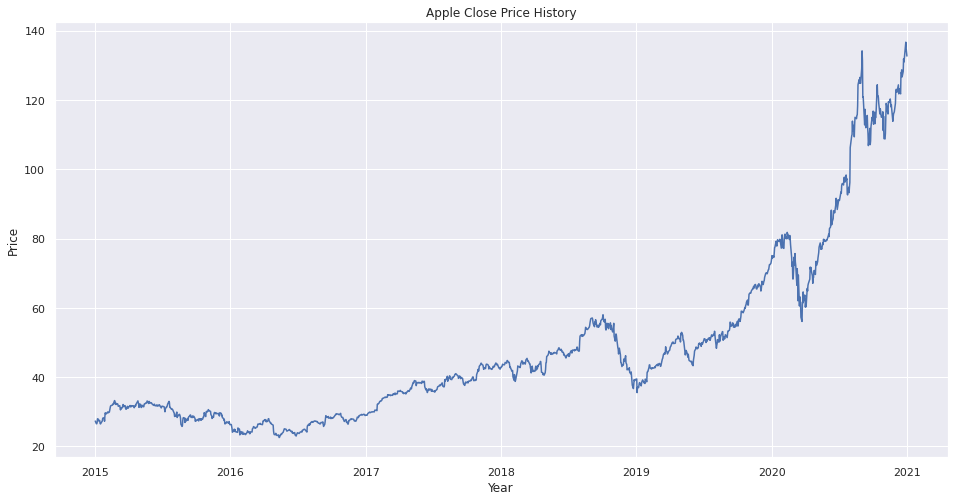

In [ ]:
#Plotting apple stock close Price
plt.figure(figsize=(16,8))
plt.title('Apple Close Price History')
plt.xlabel('Year')
plt.ylabel('Price')
plt.plot(portfolio.iloc[:, portfolio.columns.get_level_values(1)=='AAPL']['Close'])
plt.show()

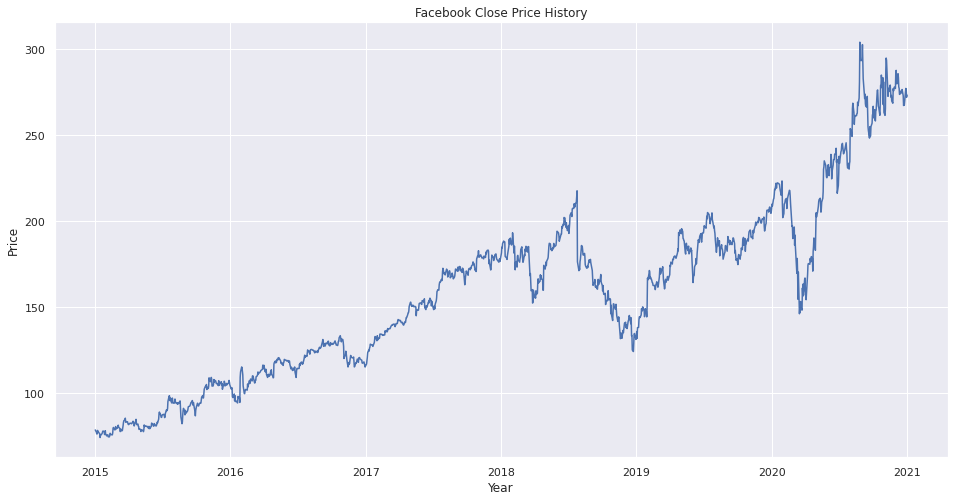

In [ ]:
#Plotting Facebook stock close Price
plt.figure(figsize=(16,8))
plt.title('Facebook Close Price History')
plt.xlabel('Year')
plt.ylabel('Price')
plt.plot(portfolio.iloc[:, portfolio.columns.get_level_values(1)=='FB']['Close'])
plt.show()

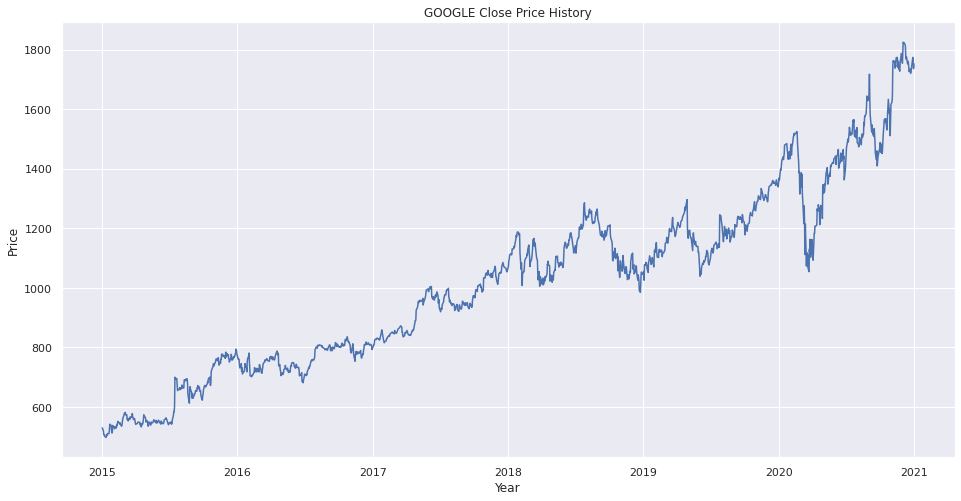

In [ ]:
#Plotting GOOGLE stock close Price
plt.figure(figsize=(16,8))
plt.title('GOOGLE Close Price History')
plt.xlabel('Year')
plt.ylabel('Price')
plt.plot(portfolio.iloc[:, portfolio.columns.get_level_values(1)=='GOOGL']['Close'])
plt.show()

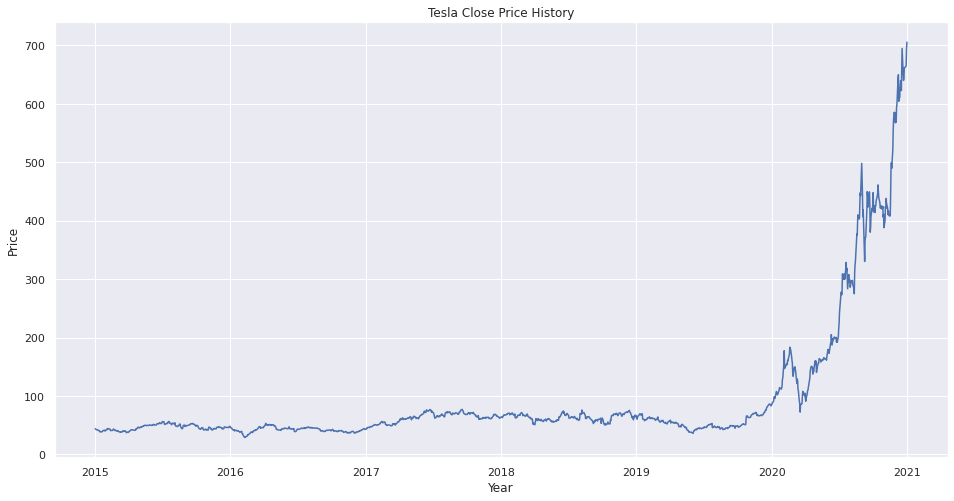

In [ ]:
#Plotting Tesla stock close Price
plt.figure(figsize=(16,8))
plt.title('Tesla Close Price History')
plt.xlabel('Year')
plt.ylabel('Price')
plt.plot(portfolio.iloc[:, portfolio.columns.get_level_values(1)=='TSLA']['Close'])
plt.show()

**BIVARIATE ANALYSIS**

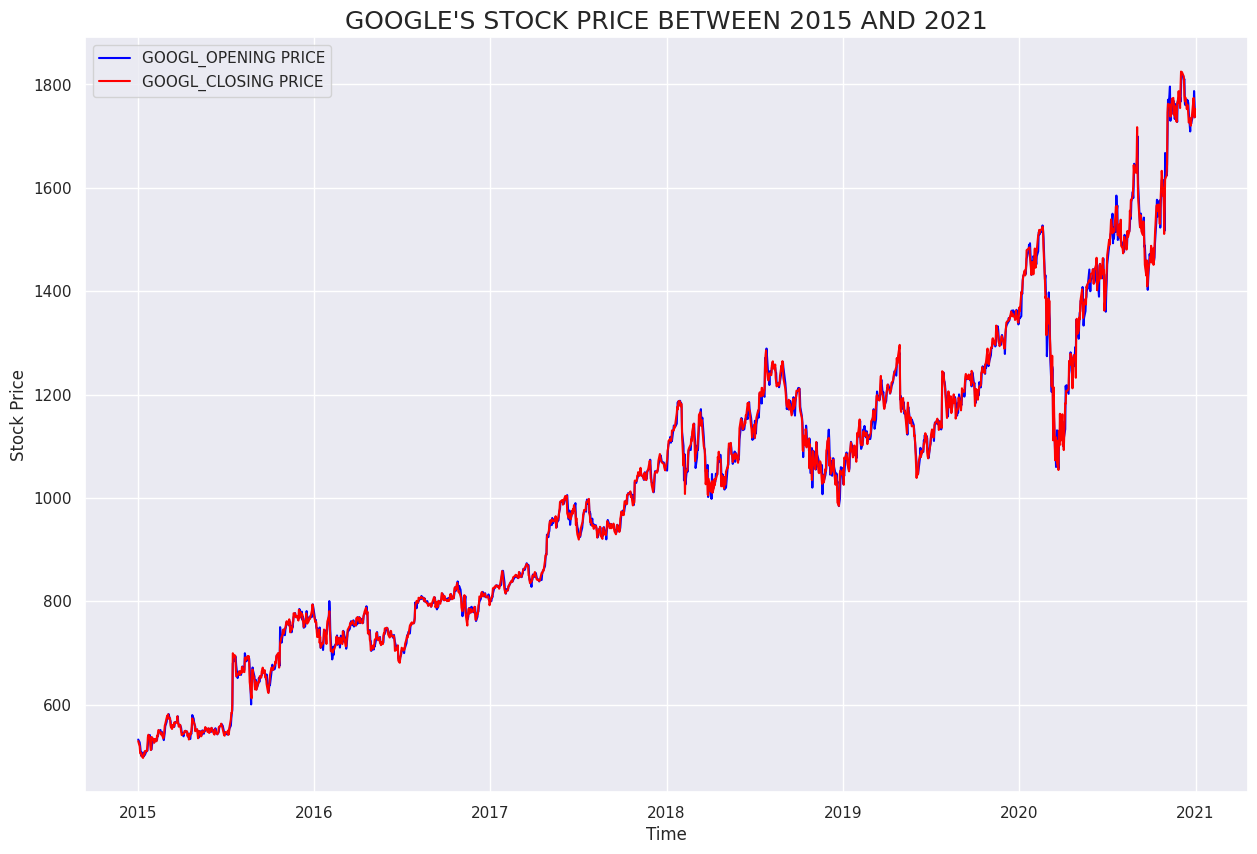

In [ ]:
open_googl = portfolio['Open', 'GOOGL']
plt.figure(figsize=(15, 10), dpi=100)
plt.plot(open_googl,color='Blue',label='GOOGL_OPENING PRICE')
plt.plot(portfolio['Close', 'GOOGL'],color='red',label='GOOGL_CLOSING PRICE')  
plt.title("GOOGLE'S STOCK PRICE BETWEEN 2015 AND 2021", fontsize=18)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend();

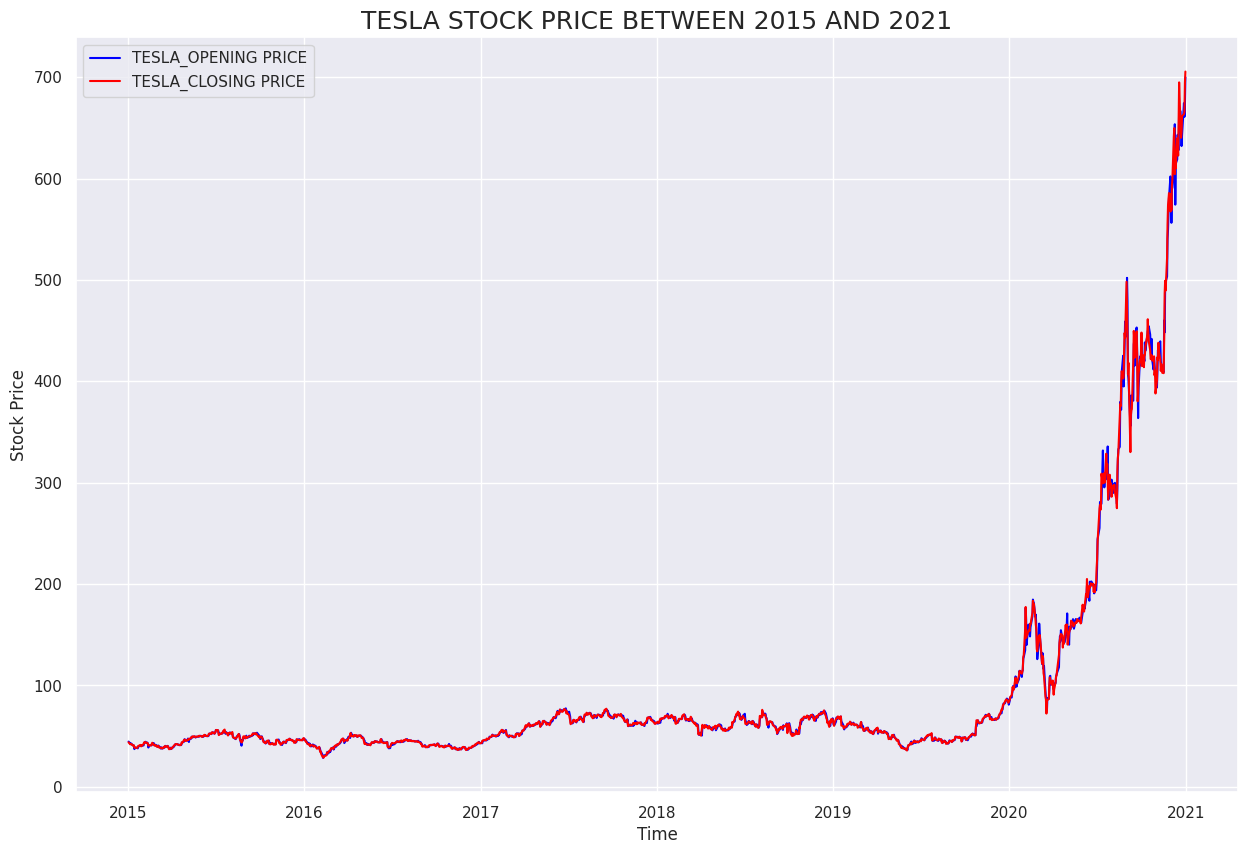

In [ ]:
open_googl = portfolio['Open', 'TSLA']
plt.figure(figsize=(15, 10), dpi=100)
plt.plot(open_googl,color='Blue',label='TESLA_OPENING PRICE')
plt.plot(portfolio['Close', 'TSLA'],color='red',label='TESLA_CLOSING PRICE')  
plt.title("TESLA STOCK PRICE BETWEEN 2015 AND 2021", fontsize=18)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend();

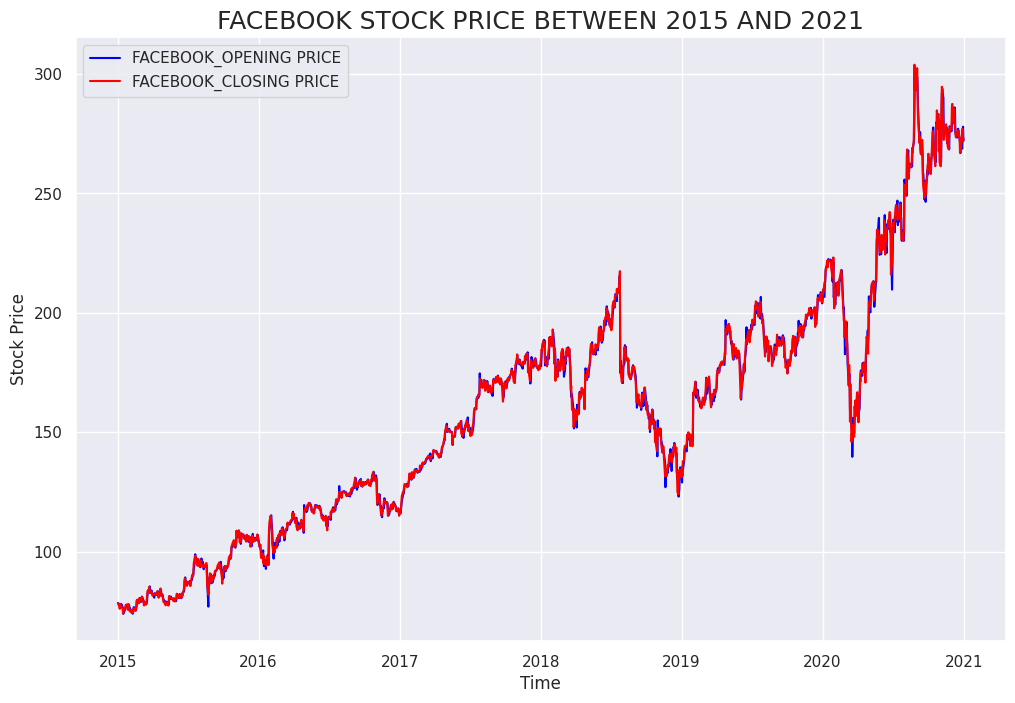

In [ ]:
open_googl = portfolio['Open', 'FB']
plt.figure(figsize=(12, 8), dpi=100)
plt.plot(open_googl,color='Blue',label='FACEBOOK_OPENING PRICE')
plt.plot(portfolio['Close', 'FB'],color='red',label='FACEBOOK_CLOSING PRICE')  
plt.title("FACEBOOK STOCK PRICE BETWEEN 2015 AND 2021", fontsize=18)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend();

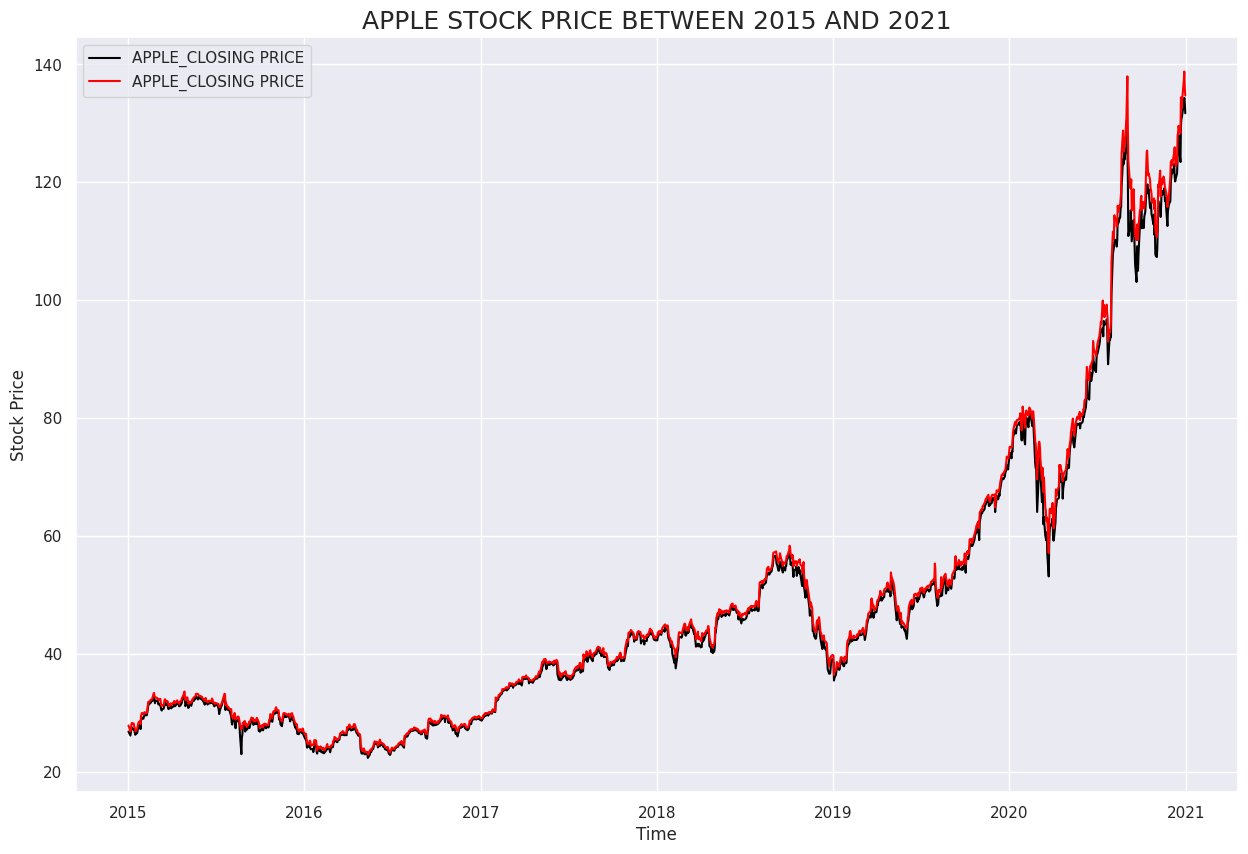

In [ ]:
plt.figure(figsize=(15, 10), dpi=100)
plt.plot(portfolio['Low','AAPL'],color='black',label='APPLE_CLOSING PRICE')
plt.plot(portfolio['High','AAPL'],color='red',label='APPLE_CLOSING PRICE')  
plt.title("APPLE STOCK PRICE BETWEEN 2015 AND 2021", fontsize=18)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend();

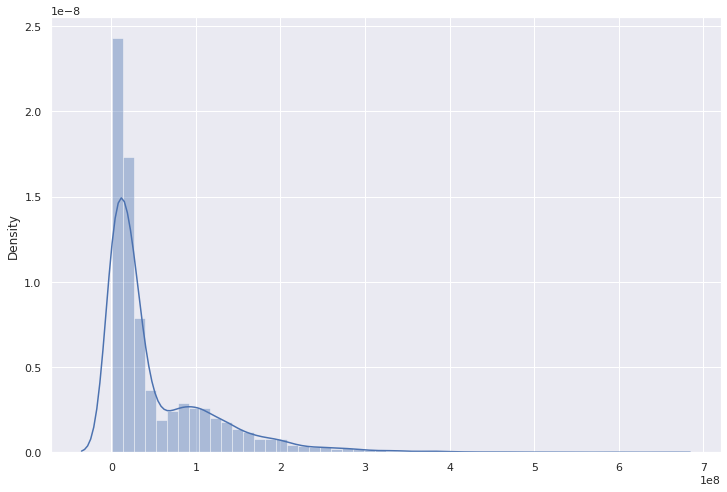

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(portfolio['Volume'])
plt.show()


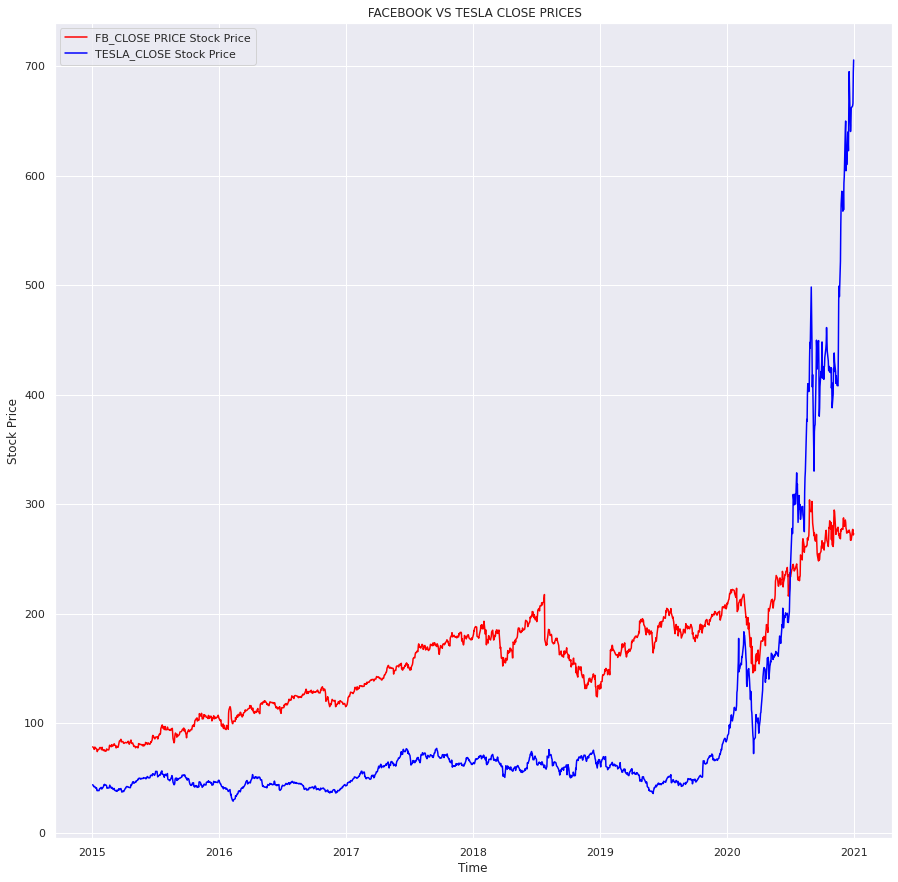

In [ ]:
plt.rcParams["figure.figsize"] = (15,15)
plt.plot(portfolio['Close','FB'],color='red',label='FB_CLOSE PRICE Stock Price')
plt.plot(portfolio['Close','TSLA'],color='blue',label='TESLA_CLOSE Stock Price')
plt.title(' FACEBOOK VS TESLA CLOSE PRICES')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

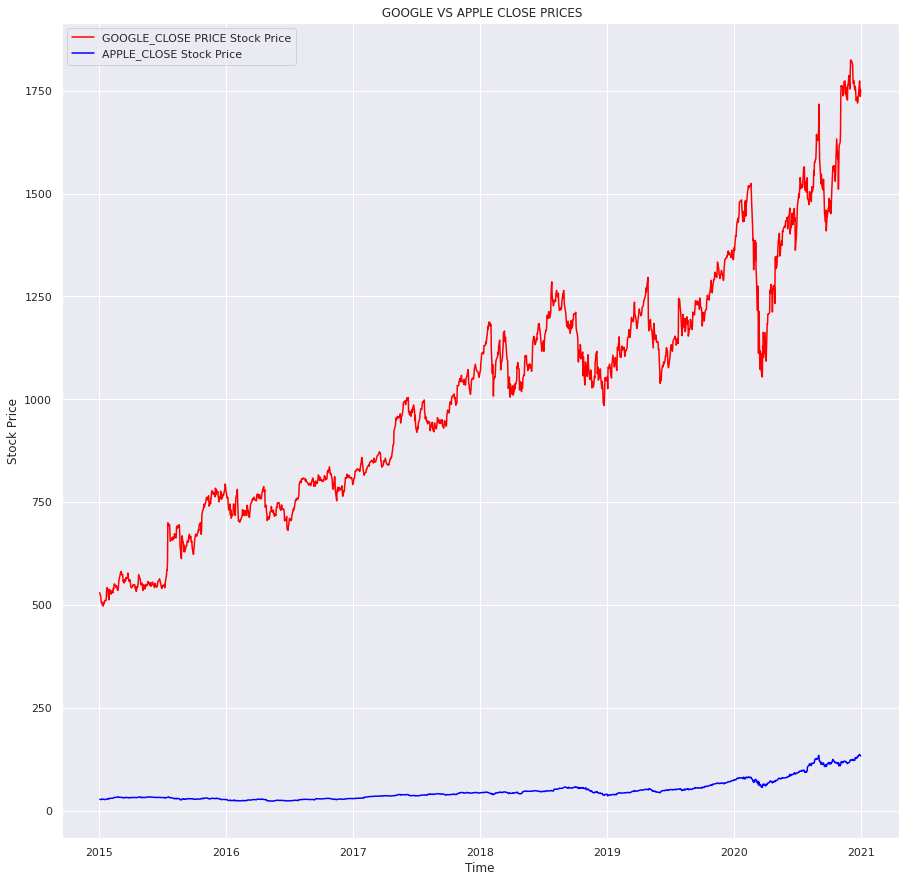

In [ ]:
plt.rcParams["figure.figsize"] = (15,15)
plt.plot(portfolio['Close','GOOGL'],color='red',label='GOOGLE_CLOSE PRICE Stock Price')
plt.plot(portfolio['Close','AAPL'],color='blue',label='APPLE_CLOSE Stock Price')
plt.title(' GOOGLE VS APPLE CLOSE PRICES')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

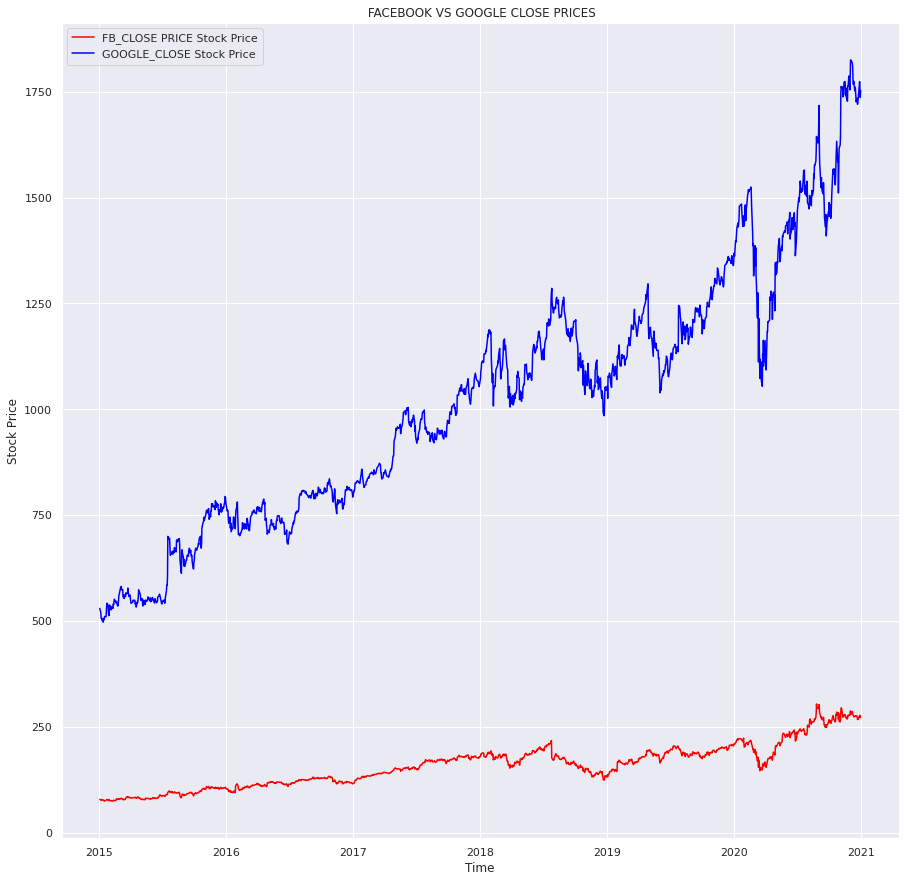

In [ ]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(portfolio['Close','FB'],color='red',label='FB_CLOSE PRICE Stock Price')
plt.plot(portfolio['Close','GOOGL'],color='blue',label='GOOGLE_CLOSE Stock Price')
plt.title(' FACEBOOK VS GOOGLE CLOSE PRICES')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

**MULTIVARIATE ANALYSIS**

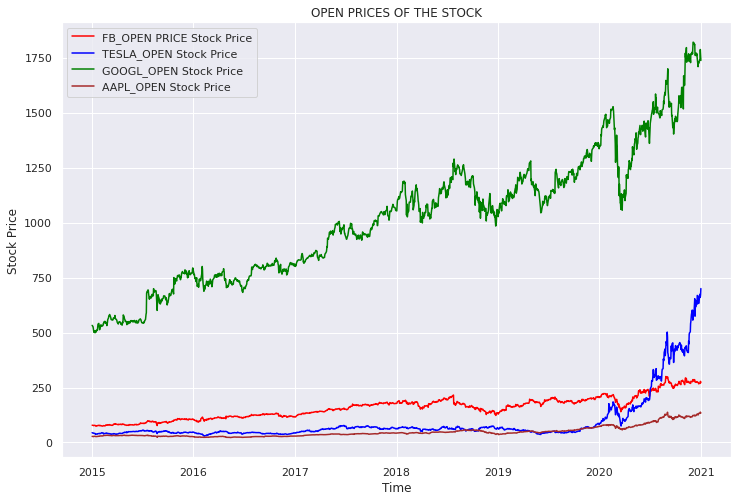

In [ ]:
#Visualization
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(portfolio['Open', 'FB'],color='red',label='FB_OPEN PRICE Stock Price')
plt.plot(portfolio['Open', 'TSLA'],color='blue',label='TESLA_OPEN Stock Price')
plt.plot(portfolio['Open', 'GOOGL'],color='green',label='GOOGL_OPEN Stock Price')
plt.plot(portfolio['Open', 'AAPL'],color='brown',label='AAPL_OPEN Stock Price')
plt.title('OPEN PRICES OF THE STOCK')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

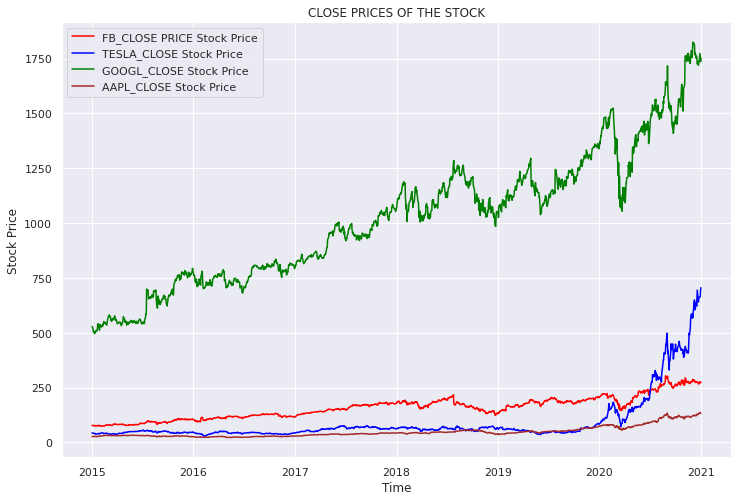

In [ ]:
#Visualization
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(portfolio['Close', 'FB'],color='red',label='FB_CLOSE PRICE Stock Price')
plt.plot(portfolio['Close', 'TSLA'],color='blue',label='TESLA_CLOSE Stock Price')
plt.plot(portfolio['Close', 'GOOGL'],color='green',label='GOOGL_CLOSE Stock Price')
plt.plot(portfolio['Close', 'AAPL'],color='brown',label='AAPL_CLOSE Stock Price')
plt.title('CLOSE PRICES OF THE STOCK')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

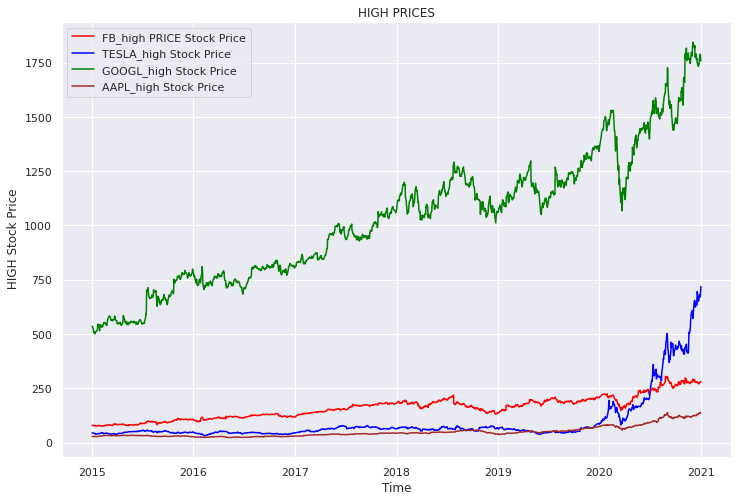

In [ ]:
#Visualization
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(portfolio['High', 'FB'],color='red',label='FB_high PRICE Stock Price')
plt.plot(portfolio['High', 'TSLA'],color='blue',label='TESLA_high Stock Price')
plt.plot(portfolio['High', 'GOOGL'],color='green',label='GOOGL_high Stock Price')
plt.plot(portfolio['High', 'AAPL'],color='brown',label='AAPL_high Stock Price')
plt.title('HIGH PRICES')
plt.xlabel('Time')
plt.ylabel(' HIGH Stock Price')
plt.legend()
plt.show()

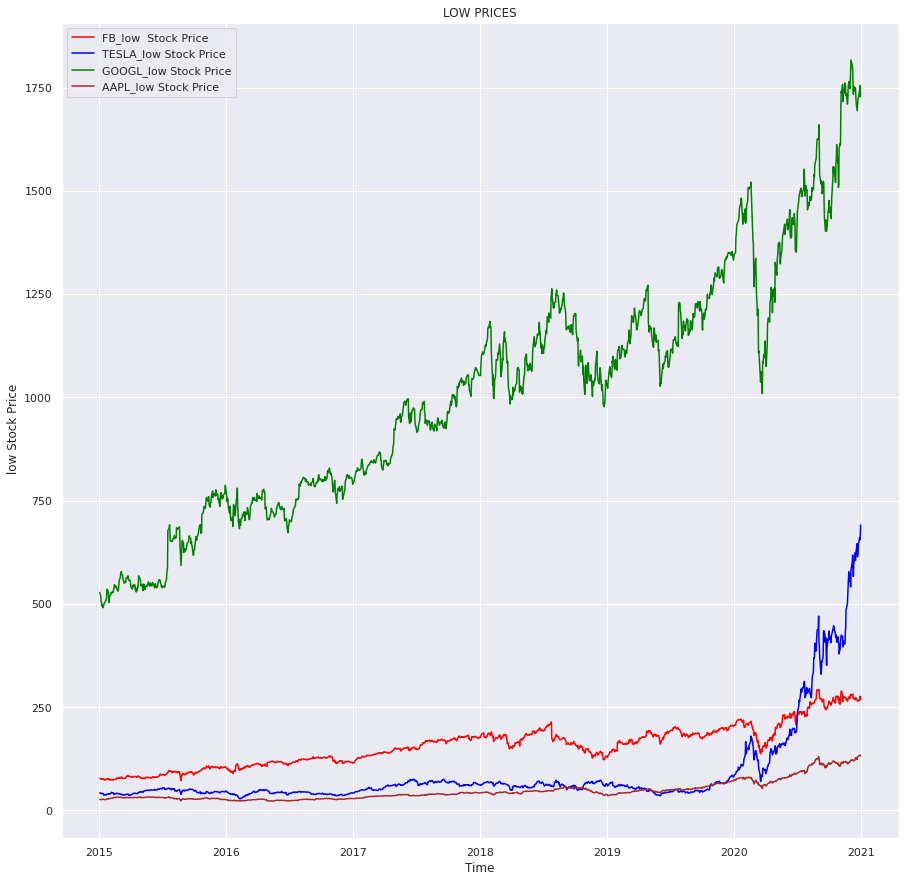

In [ ]:
#Visualization
plt.rcParams["figure.figsize"] = (15,15)
plt.plot(portfolio['Low', 'FB'],color='red',label='FB_low  Stock Price')
plt.plot(portfolio['Low', 'TSLA'],color='blue',label='TESLA_low Stock Price')
plt.plot(portfolio['Low', 'GOOGL'],color='green',label='GOOGL_low Stock Price')
plt.plot(portfolio['Low', 'AAPL'],color='brown',label='AAPL_low Stock Price')
plt.title('LOW PRICES')
plt.xlabel('Time')
plt.ylabel(' low Stock Price')
plt.legend()
plt.show()

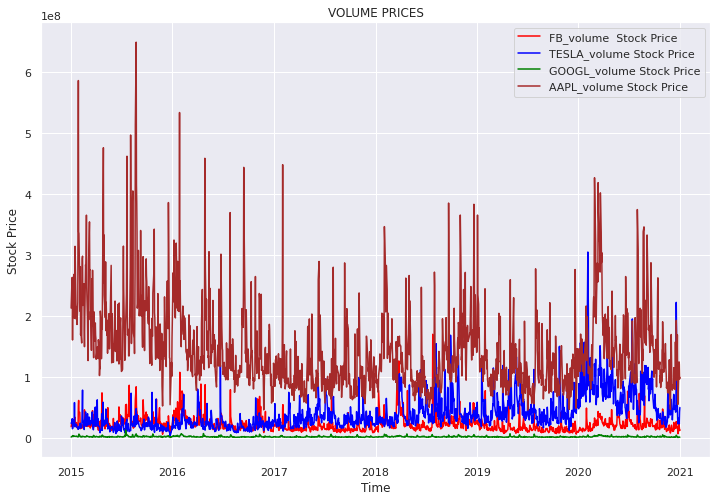

In [ ]:
#Visualization
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(portfolio['Volume', 'FB'],color='red',label='FB_volume  Stock Price')
plt.plot(portfolio['Volume', 'TSLA'],color='blue',label='TESLA_volume Stock Price')
plt.plot(portfolio['Volume', 'GOOGL'],color='green',label='GOOGL_volume Stock Price')
plt.plot(portfolio['Volume', 'AAPL'],color='brown',label='AAPL_volume Stock Price')
plt.title('VOLUME PRICES')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

#Volume Of stocks traded

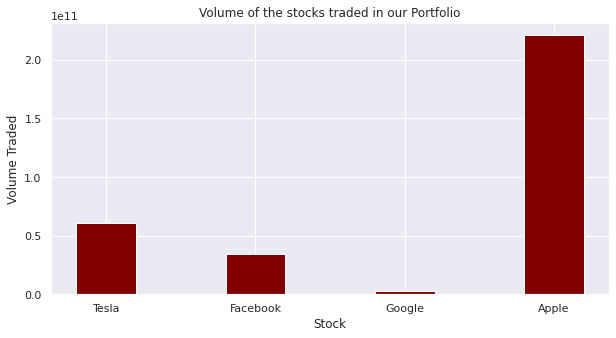

In [ ]:
data = {'Tesla':portfolio['Volume', 'TSLA'].sum(),'Facebook':portfolio['Volume', 'FB'].sum(),'Google':portfolio['Volume', 'GOOGL'].sum(),
'Apple':portfolio['Volume', 'AAPL'].sum()}
Stock = list(data.keys())
Volatility = list(data.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Stock, Volatility, color ='maroon',
        width = 0.4)
 
plt.xlabel("Stock")
plt.ylabel("Volume Traded")
plt.title("Volume of the stocks traded in our Portfolio")
plt.show()

#Most Volatile Stock

Standard Deviation: Is a measure of the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean of the set, while a high standard deviation indicates that the values are spread out over a wider range.

Standard deviation is the statistical measure of market volatility, measuring how widely prices are dispersed from the average price. If prices trade in a narrow trading range, the standard deviation will return a low value that indicates low volatility. Conversely, if prices swing wildly up and down, then standard deviation returns a high value that indicates high volatility.

Basically, standard deviation rises as prices become more volatile. As price action calms, standard deviation heads lower.

In [ ]:
#Volatility of stock in our Portfolio
Stocks = ['TSLA','FB','GOOGL','AAPL']
for s in Stocks:
  volatility = portfolio.iloc[:, portfolio.columns.get_level_values(1)==s]['Close'].std()
  print(f'The Volatility of {s} is : ',volatility)


The Volatility of TSLA is :  TSLA    112.492452
dtype: float64
The Volatility of FB is :  FB    51.216046
dtype: float64
The Volatility of GOOGL is :  GOOGL    300.194255
dtype: float64
The Volatility of AAPL is :  AAPL    25.091074
dtype: float64


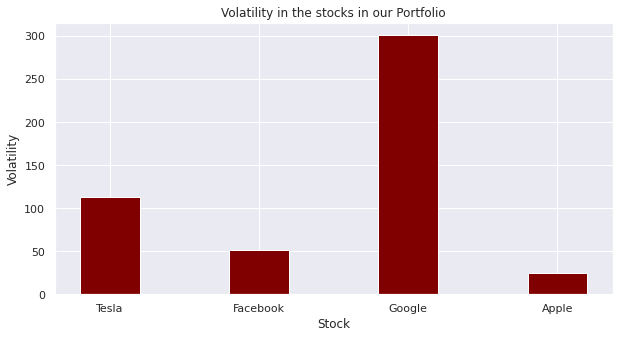

In [ ]:
#Volatility of Stocks in our Portfolio
data = {'Tesla':portfolio['Close', 'TSLA'].std(),'Facebook':portfolio['Close', 'FB'].std(),'Google':portfolio['Close', 'GOOGL'].std(),
'Apple':portfolio['Close', 'AAPL'].std()}
Stock = list(data.keys())
Volatility = list(data.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Stock, Volatility, color ='maroon',
        width = 0.4)
 
plt.xlabel("Stock")
plt.ylabel("Volatility")
plt.title("Volatility in the stocks in our Portfolio")
plt.show()

Google is the Most Volatile Stock in the Portfolio. It may give better opportunities for short term investment.
Apple Stock is more stable. Investing in Facebook long term may give better returns

Checking the specific volatilities for Apple and Google

In [ ]:
#Apple dataset
Apple = yf.download('AAPL',
start='2014-01-01',
end='2021-01-01',
progress=False, actions='inline')

In [ ]:
%time Apple['Return'] = np.log(Apple['Close']/ Apple['Close'].shift(1))

CPU times: user 3.46 ms, sys: 35 µs, total: 3.49 ms
Wall time: 4.09 ms


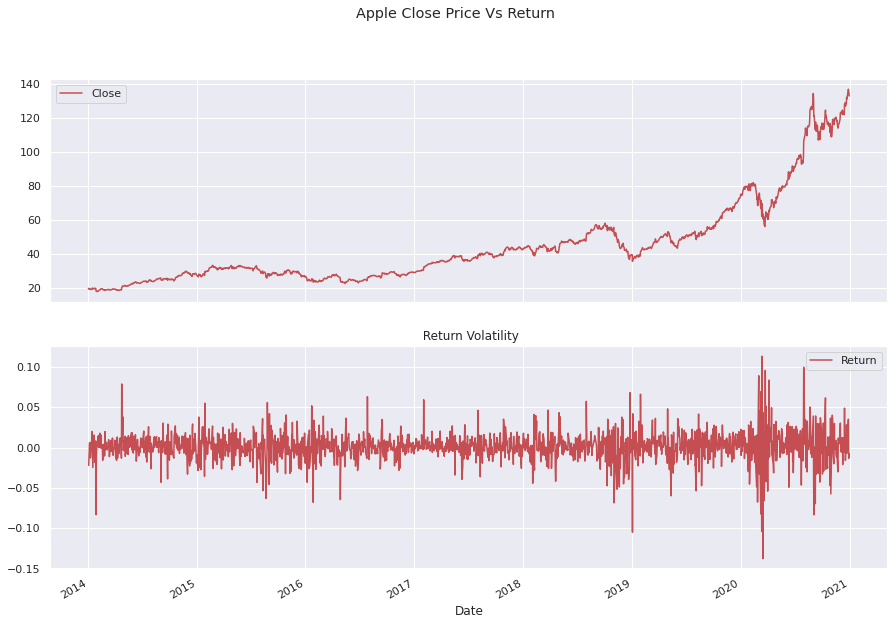

In [ ]:
Apple[['Close', 'Return']].plot(subplots=True, style='r', figsize=(15, 10), title='Apple Close Price Vs Return')
plt.title(' Return Volatility');

In [ ]:
#Google dataset
Google = yf.download('GOOGL',
start='2014-01-01',
end='2021-01-01',
progress=False, actions='inline')

In [ ]:
%time Google['Return'] = np.log(Google['Close']/ Google['Close'].shift(1))

CPU times: user 4.93 ms, sys: 0 ns, total: 4.93 ms
Wall time: 5.46 ms


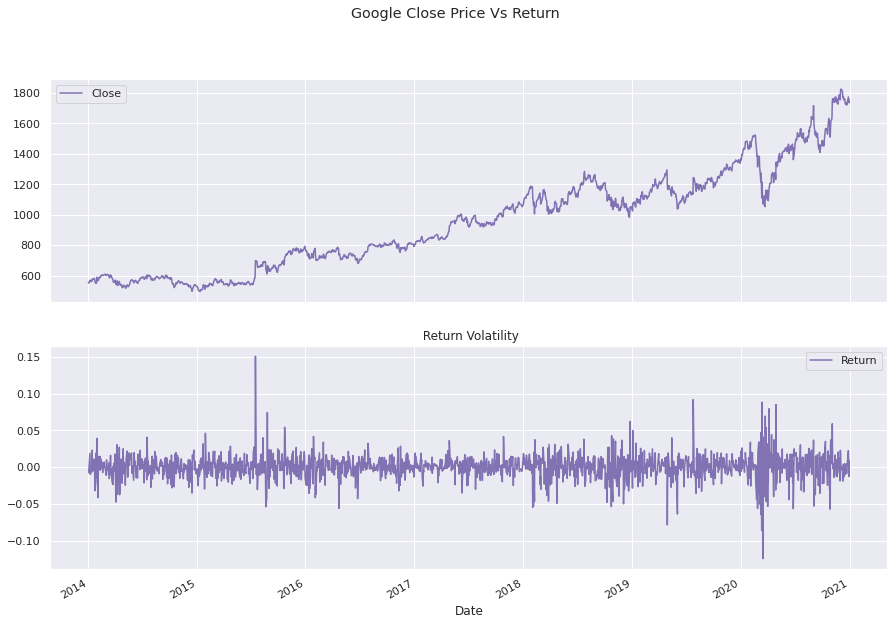

In [ ]:
Google[['Close', 'Return']].plot(subplots=True, style='m', figsize=(15, 10), title='Google Close Price Vs Return')
plt.title(' Return Volatility');

Feature Engineering. Creating a new column price for each financial instrument in our portfolio. 
Since we have 4 values of stock price for each instrument each day we will get the average of these values to get column Price

In [ ]:
#Creating new column for apple
portfolio['Price', 'AAPL'] = (portfolio.iloc[:, portfolio.columns.get_level_values(1)=='AAPL']['High'] +  portfolio.iloc[:, portfolio.columns.get_level_values(1)=='AAPL']['Low'] + portfolio.iloc[:, portfolio.columns.get_level_values(1)=='AAPL']['Open'] + portfolio.iloc[:, portfolio.columns.get_level_values(1)=='AAPL']['Close'])/4


In [ ]:
#Creating new column for Google
portfolio['Price', 'GOOGL'] = (portfolio.iloc[:, portfolio.columns.get_level_values(1)=='GOOGL']['High'] +  portfolio.iloc[:, portfolio.columns.get_level_values(1)=='GOOGL']['Low'] + portfolio.iloc[:, portfolio.columns.get_level_values(1)=='GOOGL']['Open'] + portfolio.iloc[:, portfolio.columns.get_level_values(1)=='GOOGL']['Close'])/4


In [ ]:
#Creating New column for Tesla
portfolio['Price', 'TSLA'] = (portfolio.iloc[:, portfolio.columns.get_level_values(1)=='TSLA']['High'] +  portfolio.iloc[:, portfolio.columns.get_level_values(1)=='TSLA']['Low'] + portfolio.iloc[:, portfolio.columns.get_level_values(1)=='TSLA']['Open'] + portfolio.iloc[:, portfolio.columns.get_level_values(1)=='TSLA']['Close'])/4


In [ ]:
#Creating new column for Facebook
portfolio['Price', 'FB'] = (portfolio.iloc[:, portfolio.columns.get_level_values(1)=='FB']['High'] +  portfolio.iloc[:, portfolio.columns.get_level_values(1)=='FB']['Low'] + portfolio.iloc[:, portfolio.columns.get_level_values(1)=='FB']['Open'] + portfolio.iloc[:, portfolio.columns.get_level_values(1)=='FB']['Close'])/4


In [ ]:
#Displaying New DataFrame
portfolio.head(2)

Adj Close                         ...       Price                      
                 AAPL         FB       GOOGL  ...       GOOGL       TSLA         FB
Date                                          ...                                  
2015-01-02  24.819241  78.449997  529.549988  ...  531.457489  43.934501  78.414999
2015-01-05  24.120045  77.190002  519.460022  ...  523.087509  42.415000  77.820002

[2 rows x 36 columns]

In [ ]:
#Describing the Tesla stocks with the Average Price Column
portfolio.iloc[:, portfolio.columns.get_level_values(1)=='TSLA']['Price'].describe()

,TSLA
count,1511.000000
mean,93.193121
std,111.991150
min,29.544000
25%,45.477250
50%,56.790000
75%,69.380498
max,703.874985


We can see that 75% of the stocks have a price of under 69$, indicating that the stock market is mostly dominated by the bigger companies.

In [ ]:
portfolio.iloc[:, portfolio.columns.get_level_values(1)=='FB']['Price'].describe()

,FB
count,1511.000000
mean,158.329093
std,51.183145
min,74.192501
25%,117.736249
50%,161.817497
75%,186.823750
max,299.507500


# **S&P 500 Exploratory Data Analysis**

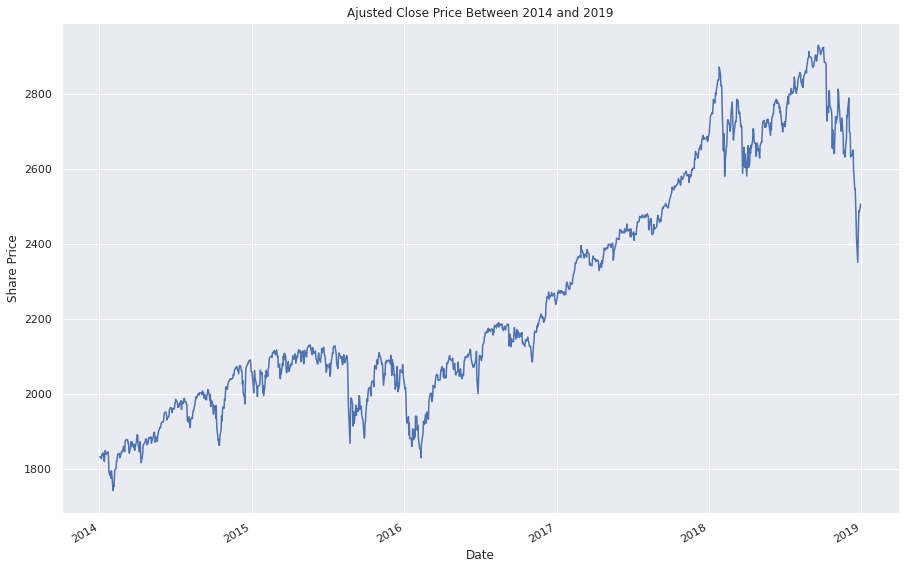

In [ ]:
sp500['Adj Close'].plot(figsize=(15,10))
plt.ylabel('Share Price')
plt.title('Ajusted Close Price Between 2014 and 2019');

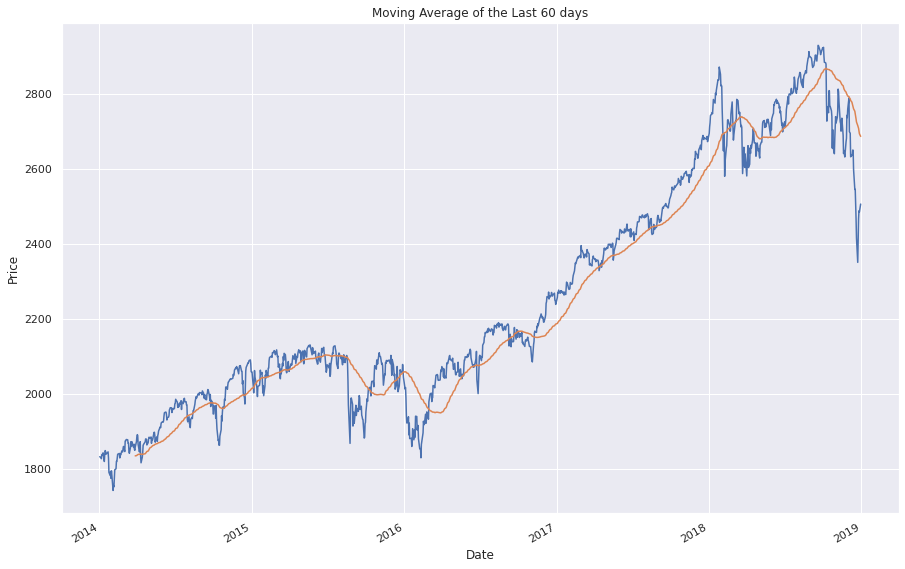

In [ ]:
sp500['Adj Close'].plot(figsize=(15,10))
sp500.rolling(window=60).mean()['Adj Close'].plot()
plt.ylabel('Price')
plt.title('Moving Average of the Last 60 days');

In [ ]:
%time sp500['Return'] = np.log(sp500['Close']/ sp500['Close'].shift(1))

CPU times: user 2.95 ms, sys: 0 ns, total: 2.95 ms
Wall time: 2.96 ms


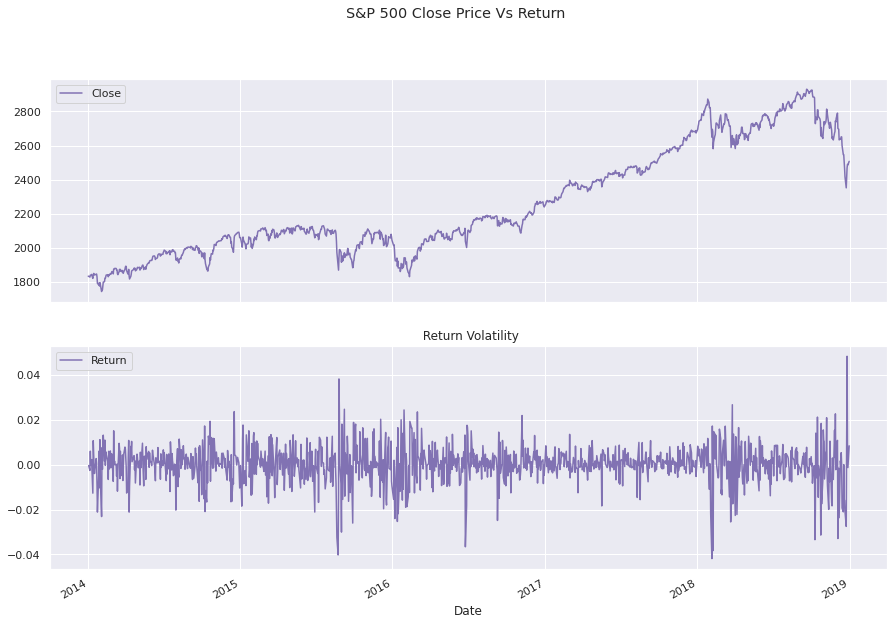

In [ ]:
sp500[['Close', 'Return']].plot(subplots=True, style='m', figsize=(15, 10), title='S&P 500 Close Price Vs Return')
plt.title(' Return Volatility');

# **S&P 500 Modelling**

#Linear Regression Model

In [ ]:
#Downloading S&P 500 2015-2021 Data from Yahoo Finance
sp500_LR = yf.download('^GSPC',
start='2014-01-01',
end='2019-01-01',
progress=False, actions='inline')

In [ ]:
#Making date index a column instead
sp500_LR.reset_index(inplace=True)

In [ ]:
sp500_LR.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980,3080600000,0,0
1,2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,2774270000,0,0


In [ ]:
#Creating new Varibles from date column that can be used in the ML model
sp500_LR['year'] = sp500_LR['Date'].dt.year
sp500_LR['month'] = sp500_LR['Date'].dt.month
sp500_LR['Day'] = sp500_LR['Date'].dt.day

In [ ]:
#Dropping Date column since it wont be used anymore
sp500_LR = sp500_LR.drop(['Date'],axis=1)

In [ ]:
#Preparing the data
X = sp500_LR.drop(['Adj Close'],axis=1)
y = sp500_LR['Adj Close']

In [ ]:
#Splitting Data into Training and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#Fiting the data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Predictions
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
5,1838.130005,1838.130005
494,2041.890015,2041.890015
52,1860.770020,1860.770020
985,2626.070068,2626.070068
186,1977.800049,1977.800049
...,...,...
1103,2733.010010,2733.010010
31,1840.760010,1840.760010
408,2102.439941,2102.439941
64,1865.089966,1865.089966


In [ ]:
print('Prediction Score : ' , regressor.score(X_test,y_test))
error = mean_squared_error(y_test,y_pred)
print('Mean Squared Error : ',error)

Prediction Score :  1.0
Mean Squared Error :  5.463936912665089e-18


#LSTM MODEL

In [ ]:
#Data Preparation and Scaling
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(sp500['Adj Close'].values.reshape(-1,1))

prediction_days = 60

In [ ]:
#Instantiating Empty X_train and Y_train
X_train = []
y_train = []



for x in range(prediction_days, len(scaled_data)):
  X_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x,0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
#Instantiate Sequential Model
model = Sequential()

#Adding Layer One
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
#Dropping some features
model.add(Dropout(0.2))

#Adding Layer two
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

#Adding Layer three
model.add(LSTM(units=50))
model.add(Dropout(0.2))

#Adding the Output Layer
model.add(Dense(units=1))

# **Fitting the Model**

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 35, batch_size = 32)

Epoch 1/35
38/38 [==============================] - 8s 80ms/step - loss: 0.0759
Epoch 2/35
38/38 [==============================] - 3s 87ms/step - loss: 0.0060
Epoch 3/35
38/38 [==============================] - 3s 88ms/step - loss: 0.0053
Epoch 4/35
38/38 [==============================] - 3s 88ms/step - loss: 0.0048
Epoch 5/35
38/38 [==============================] - 3s 88ms/step - loss: 0.0044
Epoch 6/35
38/38 [==============================] - 3s 85ms/step - loss: 0.0040
Epoch 7/35
38/38 [==============================] - 3s 87ms/step - loss: 0.0038
Epoch 8/35
38/38 [==============================] - 3s 88ms/step - loss: 0.0036
Epoch 9/35
38/38 [==============================] - 3s 88ms/step - loss: 0.0039
Epoch 10/35
38/38 [==============================] - 3s 86ms/step - loss: 0.0037
Epoch 11/35
38/38 [==============================] - 3s 88ms/step - loss: 0.0036
Epoch 12/35
38/38 [==============================] - 3s 84ms/step - loss: 0.0035
Epoch 13/35
38/38 [==================

In [ ]:
#Deriving Test Data
test_data = yf.download('^GSPC',
start='2019-01-01',
end='2020-01-01',
progress=False, actions='inline')

In [ ]:
actual_prices = test_data['Adj Close'].values


all_data = pd.concat((sp500['Adj Close'], test_data['Adj Close']), axis=0)

model_inputs = all_data[len(all_data)- len(test_data) - prediction_days:].values

model_inputs = model_inputs.reshape(-1, 1)

model_inputs = scaler.transform(model_inputs)

# **Predictions**

In [ ]:
X_test = []

for x in range(prediction_days, len(model_inputs)):
    X_test.append(model_inputs[x-prediction_days:x, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_prices = model.predict(X_test)

#Reverse scaling the prices

predicted_prices = scaler.inverse_transform(predicted_prices)

# **Visualization**

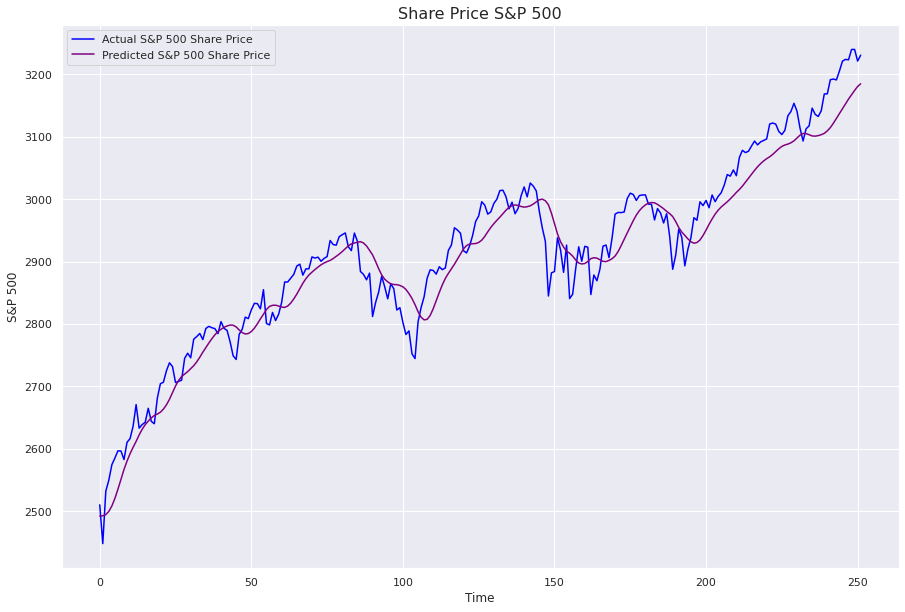

In [ ]:
#Plotting the Predictions on Test Data
plt.figure(figsize=(15,10))
plt.plot(actual_prices, color= 'blue', label = 'Actual S&P 500 Share Price')
plt.plot(predicted_prices, color='purple', label = 'Predicted S&P 500 Share Price')
plt.title('Share Price S&P 500', fontsize=16)
plt.xlabel('Time')
plt.ylabel('S&P 500')
plt.legend();

#Modelling for Apple

In [ ]:
#Downloading Apple 2015-2021 Data from Yahoo Finance
Apple = yf.download('AAPL',
start='2014-01-01',
end='2019-01-01',
progress=False, actions='inline')

In [ ]:
Apple.head(3)

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.568451,234684800,0.0,0.0
2014-01-03,19.745001,19.775000,19.301071,19.320715,17.182550,392467600,0.0,0.0
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.276245,412610800,0.0,0.0


In [ ]:
#Importing a Scaler
from sklearn.preprocessing import MinMaxScaler

import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
#data Normalzation
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Apple['Adj Close'].values.reshape(-1,1))

prediction_days = 60

In [ ]:
#Instantiating Empty X_train and Y_train
X_train = []
y_train = []



for x in range(prediction_days, len(scaled_data)):
  X_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x,0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
#Instantiate Sequential Model
model = Sequential()

#Adding Layer One
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
#Dropping some features
model.add(Dropout(0.2))

#Adding Layer two
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

#Adding Layer three
model.add(LSTM(units=50))
model.add(Dropout(0.2))

#Adding the Output Layer
model.add(Dense(units=1))

In [ ]:
#Fitting the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
38/38 [==============================] - 8s 82ms/step - loss: 0.0358
Epoch 2/15
38/38 [==============================] - 3s 88ms/step - loss: 0.0043
Epoch 3/15
38/38 [==============================] - 3s 88ms/step - loss: 0.0040
Epoch 4/15
38/38 [==============================] - 3s 87ms/step - loss: 0.0037
Epoch 5/15
38/38 [==============================] - 3s 86ms/step - loss: 0.0036
Epoch 6/15
38/38 [==============================] - 3s 90ms/step - loss: 0.0034
Epoch 7/15
38/38 [==============================] - 3s 86ms/step - loss: 0.0031
Epoch 8/15
38/38 [==============================] - 3s 84ms/step - loss: 0.0029
Epoch 9/15
38/38 [==============================] - 3s 92ms/step - loss: 0.0026
Epoch 10/15
38/38 [==============================] - 3s 86ms/step - loss: 0.0028
Epoch 11/15
38/38 [==============================] - 3s 86ms/step - loss: 0.0021
Epoch 12/15
38/38 [==============================] - 3s 87ms/step - loss: 0.0024
Epoch 13/15
38/38 [==================

In [ ]:
#Deriving Test Data
test_data = yf.download('AAPL',
start='2019-01-01',
end='2020-01-01',
progress=False, actions='inline')

In [ ]:
actual_prices = test_data['Adj Close'].values


all_data = pd.concat((Apple['Adj Close'], test_data['Adj Close']), axis=0)

model_inputs = all_data[len(all_data)- len(test_data) - prediction_days:].values

model_inputs = model_inputs.reshape(-1, 1)

model_inputs = scaler.transform(model_inputs)

In [ ]:
#Predictions
X_test = []

for x in range(prediction_days, len(model_inputs)):
    X_test.append(model_inputs[x-prediction_days:x, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_prices = model.predict(X_test)

#Reverse scaling the prices

predicted_prices = scaler.inverse_transform(predicted_prices)

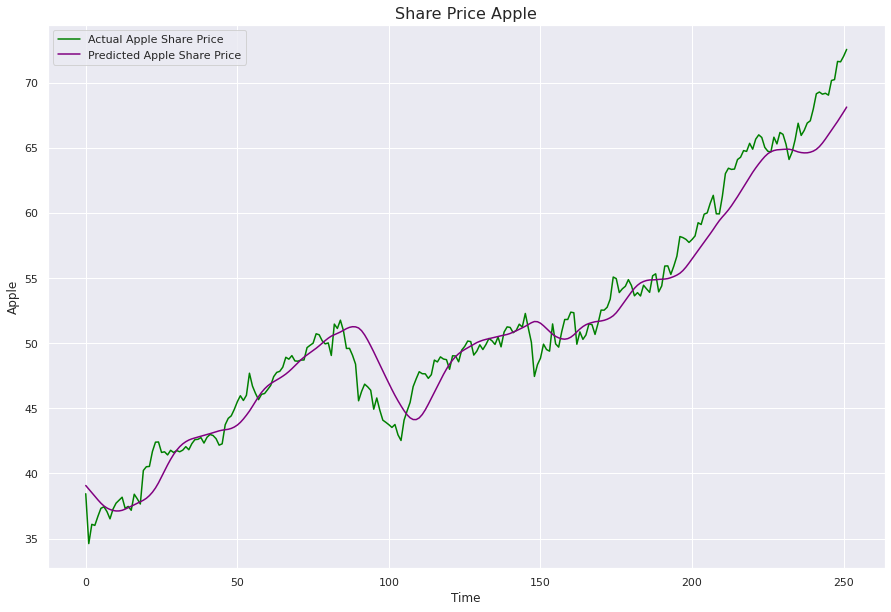

In [ ]:
#Plotting the Predictions on Test Data
plt.figure(figsize=(15,10))
plt.plot(actual_prices, color= 'green', label = 'Actual Apple Share Price')
plt.plot(predicted_prices, color='purple', label = 'Predicted Apple Share Price')
plt.title('Share Price Apple', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Apple')
plt.legend();

In [ ]:
rmse = np.sqrt(np.mean(predicted_prices -actual_prices)**2)
rmse

0.4690143040248326

#Model for Facebook Stock

In [ ]:
#Downloading Facebook 2015-2021 Data from Yahoo Finance
Facebook = yf.download('FB',
start='2014-01-01',
end='2019-01-01',
progress=False, actions='inline')

In [ ]:
#data Normalzation
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Facebook['Adj Close'].values.reshape(-1,1))

prediction_days = 60

In [ ]:
#Instantiating Empty X_train and Y_train
X_train = []
y_train = []



for x in range(prediction_days, len(scaled_data)):
  X_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x,0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
#Instantiate Sequential Model
model = Sequential()

#Adding Layer One
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
#Dropping some features
model.add(Dropout(0.2))

#Adding Layer two
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

#Adding Layer three
model.add(LSTM(units=50))
model.add(Dropout(0.2))

#Adding the Output Layer
model.add(Dense(units=1))

In [ ]:
#Fitting the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
38/38 [==============================] - 8s 81ms/step - loss: 0.0530
Epoch 2/15
38/38 [==============================] - 3s 83ms/step - loss: 0.0046
Epoch 3/15
38/38 [==============================] - 3s 84ms/step - loss: 0.0036
Epoch 4/15
38/38 [==============================] - 3s 84ms/step - loss: 0.0036
Epoch 5/15
38/38 [==============================] - 3s 83ms/step - loss: 0.0037
Epoch 6/15
38/38 [==============================] - 3s 84ms/step - loss: 0.0030
Epoch 7/15
38/38 [==============================] - 3s 85ms/step - loss: 0.0033
Epoch 8/15
38/38 [==============================] - 3s 86ms/step - loss: 0.0030
Epoch 9/15
38/38 [==============================] - 3s 86ms/step - loss: 0.0033
Epoch 10/15
38/38 [==============================] - 3s 84ms/step - loss: 0.0032
Epoch 11/15
38/38 [==============================] - 3s 84ms/step - loss: 0.0028
Epoch 12/15
38/38 [==============================] - 3s 85ms/step - loss: 0.0026
Epoch 13/15
38/38 [==================

In [ ]:
#Deriving Test Data
test_data = yf.download('FB',
start='2019-01-01',
end='2020-01-01',
progress=False, actions='inline')

In [ ]:
actual_prices = test_data['Adj Close'].values


all_data = pd.concat((Facebook['Adj Close'], test_data['Adj Close']), axis=0)

model_inputs = all_data[len(all_data)- len(test_data) - prediction_days:].values

model_inputs = model_inputs.reshape(-1, 1)

model_inputs = scaler.transform(model_inputs)

In [ ]:
#Predictions
X_test = []

for x in range(prediction_days, len(model_inputs)):
    X_test.append(model_inputs[x-prediction_days:x, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_prices = model.predict(X_test)

#Reverse scaling the prices

predicted_prices = scaler.inverse_transform(predicted_prices)

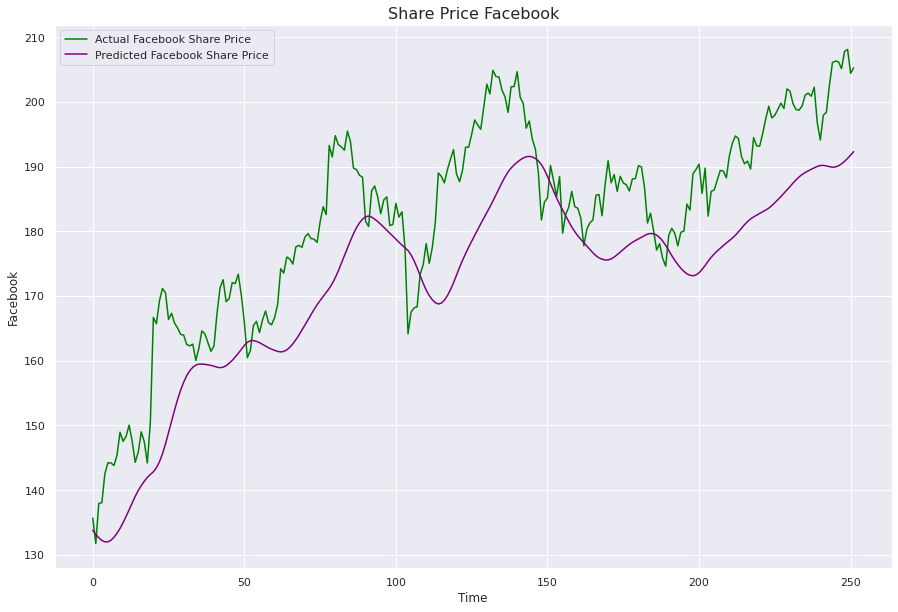

In [ ]:
#Plotting the Predictions on Test Data
plt.figure(figsize=(15,10))
plt.plot(actual_prices, color= 'green', label = 'Actual Facebook Share Price')
plt.plot(predicted_prices, color='purple', label = 'Predicted Facebook Share Price')
plt.title('Share Price Facebook', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Facebook')
plt.legend();

In [ ]:
rmse = np.sqrt(np.mean(predicted_prices -actual_prices)**2)
rmse

9.278307839045448

#Model for Google Stock

In [ ]:
#Downloading Google 2015-2021 Data from Yahoo Finance
Google = yf.download('GOOGL',
start='2014-01-01',
end='2019-01-01',
progress=False, actions='inline')

In [ ]:
#data Normalzation
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Google['Adj Close'].values.reshape(-1,1))

prediction_days = 60

In [ ]:
#Instantiating Empty X_train and Y_train
X_train = []
y_train = []



for x in range(prediction_days, len(scaled_data)):
  X_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x,0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
#Instantiate Sequential Model
model = Sequential()

#Adding Layer One
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
#Dropping some features
model.add(Dropout(0.2))

#Adding Layer two
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

#Adding Layer three
model.add(LSTM(units=50))
model.add(Dropout(0.2))

#Adding the Output Layer
model.add(Dense(units=1))

In [ ]:
#Fitting the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
38/38 [==============================] - 8s 82ms/step - loss: 0.0682
Epoch 2/15
38/38 [==============================] - 3s 85ms/step - loss: 0.0044
Epoch 3/15
38/38 [==============================] - 3s 86ms/step - loss: 0.0046
Epoch 4/15
38/38 [==============================] - 3s 87ms/step - loss: 0.0039
Epoch 5/15
38/38 [==============================] - 3s 86ms/step - loss: 0.0034
Epoch 6/15
38/38 [==============================] - 3s 87ms/step - loss: 0.0041
Epoch 7/15
38/38 [==============================] - 4s 94ms/step - loss: 0.0031
Epoch 8/15
38/38 [==============================] - 3s 87ms/step - loss: 0.0034
Epoch 9/15
38/38 [==============================] - 3s 88ms/step - loss: 0.0033
Epoch 10/15
38/38 [==============================] - 3s 88ms/step - loss: 0.0031
Epoch 11/15
38/38 [==============================] - 3s 86ms/step - loss: 0.0027
Epoch 12/15
38/38 [==============================] - 3s 86ms/step - loss: 0.0028
Epoch 13/15
38/38 [==================

In [ ]:
#Deriving Test Data
test_data = yf.download('GOOGL',
start='2019-01-01',
end='2020-01-01',
progress=False, actions='inline')

In [ ]:
actual_prices = test_data['Adj Close'].values


all_data = pd.concat((Google['Adj Close'], test_data['Adj Close']), axis=0)

model_inputs = all_data[len(all_data)- len(test_data) - prediction_days:].values

model_inputs = model_inputs.reshape(-1, 1)

model_inputs = scaler.transform(model_inputs)

In [ ]:
#Predictions
X_test = []

for x in range(prediction_days, len(model_inputs)):
    X_test.append(model_inputs[x-prediction_days:x, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_prices = model.predict(X_test)

#Reverse scaling the prices

predicted_prices = scaler.inverse_transform(predicted_prices)

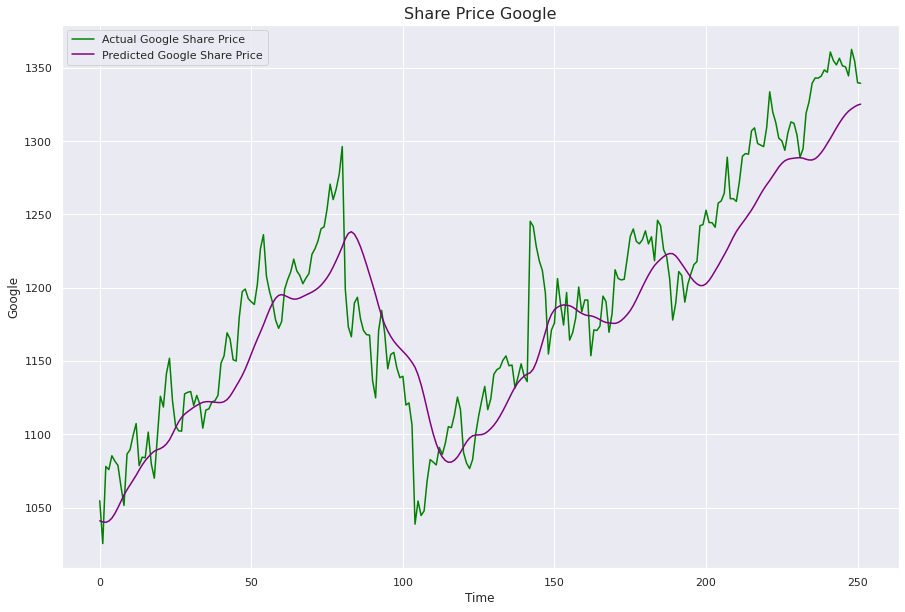

In [ ]:
#Plotting the Predictions on Test Data
plt.figure(figsize=(15,10))
plt.plot(actual_prices, color= 'green', label = 'Actual Google Share Price')
plt.plot(predicted_prices, color='purple', label = 'Predicted Google Share Price')
plt.title('Share Price Google', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Google')
plt.legend();

In [ ]:
rmse = np.sqrt(np.mean(predicted_prices -actual_prices)**2)
rmse

14.197887602306547

#Model for Tesla Stock

In [ ]:
#Downloading Google 2015-2021 Data from Yahoo Finance
Tesla = yf.download('TSLA',
start='2014-01-01',
end='2019-01-01',
progress=False, actions='inline')

In [ ]:
Tesla.head(2)

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2014-01-02,29.959999,30.496,29.309999,30.020000,30.020000,30942000,0,0
2014-01-03,30.000000,30.438,29.719999,29.912001,29.912001,23475000,0,0


In [ ]:
#data Normalzation
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Tesla['Adj Close'].values.reshape(-1,1))

prediction_days = 60

In [ ]:
#Instantiating Empty X_train and Y_train
X_train = []
y_train = []



for x in range(prediction_days, len(scaled_data)):
  X_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x,0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
#Instantiate Sequential Model
model = Sequential()

#Adding Layer One
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
#Dropping some features
model.add(Dropout(0.2))

#Adding Layer two
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

#Adding Layer three
model.add(LSTM(units=50))
model.add(Dropout(0.2))

#Adding the Output Layer
model.add(Dense(units=1))

In [ ]:
#Fitting the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
38/38 [==============================] - 8s 80ms/step - loss: 0.0848
Epoch 2/15
38/38 [==============================] - 3s 85ms/step - loss: 0.0099
Epoch 3/15
38/38 [==============================] - 3s 84ms/step - loss: 0.0096
Epoch 4/15
38/38 [==============================] - 3s 88ms/step - loss: 0.0084
Epoch 5/15
38/38 [==============================] - 3s 91ms/step - loss: 0.0082
Epoch 6/15
38/38 [==============================] - 3s 90ms/step - loss: 0.0081
Epoch 7/15
38/38 [==============================] - 3s 88ms/step - loss: 0.0082
Epoch 8/15
38/38 [==============================] - 3s 87ms/step - loss: 0.0069
Epoch 9/15
38/38 [==============================] - 3s 87ms/step - loss: 0.0076
Epoch 10/15
38/38 [==============================] - 3s 89ms/step - loss: 0.0062
Epoch 11/15
38/38 [==============================] - 3s 91ms/step - loss: 0.0069
Epoch 12/15
38/38 [==============================] - 4s 93ms/step - loss: 0.0062
Epoch 13/15
38/38 [==================

In [ ]:
#Deriving Test Data
test_data = yf.download('TSLA',
start='2019-01-01',
end='2020-01-01',
progress=False, actions='inline')

In [ ]:
actual_prices = test_data['Adj Close'].values


all_data = pd.concat((Tesla['Adj Close'], test_data['Adj Close']), axis=0)

model_inputs = all_data[len(all_data)- len(test_data) - prediction_days:].values

model_inputs = model_inputs.reshape(-1, 1)

model_inputs = scaler.transform(model_inputs)

In [ ]:
#Predictions
X_test = []

for x in range(prediction_days, len(model_inputs)):
    X_test.append(model_inputs[x-prediction_days:x, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_prices = model.predict(X_test)

#Reverse scaling the prices

predicted_prices = scaler.inverse_transform(predicted_prices)

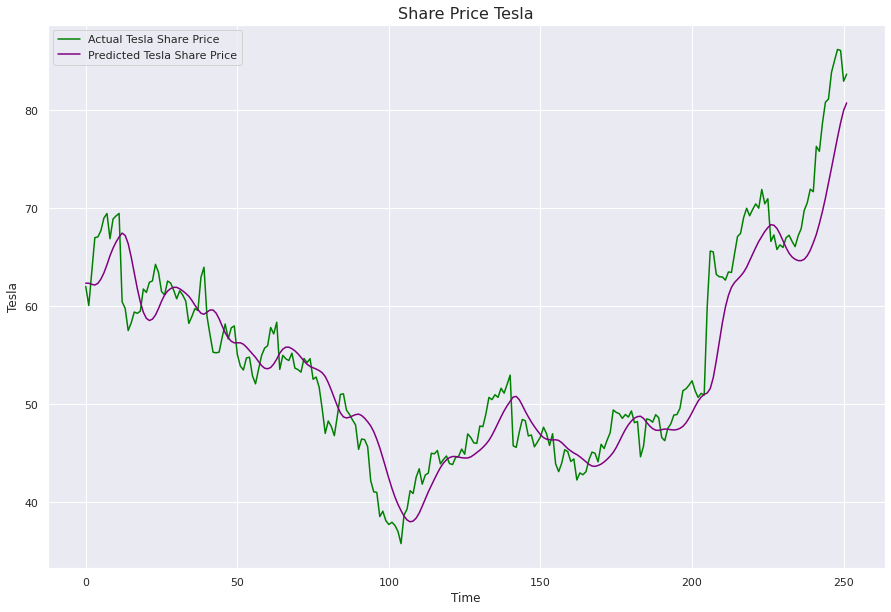

In [ ]:
#Plotting the Predictions on Test Data
plt.figure(figsize=(15,10))
plt.plot(actual_prices, color= 'green', label = 'Actual Tesla Share Price')
plt.plot(predicted_prices, color='purple', label = 'Predicted Tesla Share Price')
plt.title('Share Price Tesla', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Tesla')
plt.legend();

In [ ]:
rmse = np.sqrt(np.mean(predicted_prices -actual_prices)**2)
rmse

0.8666097852918837

# **Conclusions and Recommendations**

Our model performs extremely well. Compared to a linear regression, it generalizes well on the data. 

In [ ]:
#Did we have the right data?  Yes

In [ ]:
#Did we ask the right questions? Yes